In [1]:
# import
import tensorflow.keras.layers as Layers
import tensorflow.keras.activations as Actications
import tensorflow.keras.models as Models
import tensorflow.keras.optimizers as Optimizer
import tensorflow.keras.metrics as Metrics
import tensorflow.keras.utils as Utils
from keras.utils.vis_utils import model_to_dot
import os
import matplotlib.pyplot as plot
import cv2
import numpy as np
import pandas as pd
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix as CM
from random import randint
import matplotlib.gridspec as gridspec
import matplotlib as plt

In [2]:
def get_classlabel(class_code):
    labels = {2:'glacier', 4:'sea', 0:'buildings', 1:'forest', 5:'street', 3:'mountain'}

    return labels[class_code]

In [3]:
class_names_label = {'mountain': 3,
                    'street' : 5,
                    'glacier' : 2,
                    'buildings' : 0,
                    'sea' : 4,
                    'forest' : 1
                    }
def get_images(directory,mode):
    """
        Load the data:
            - 14,034 images to train the network.
            - 10,000 images to evaluate how accurately the network learned to classify images.
    """

    size = (150,150)
    output = []
    images = []
    labels = []
    for file in os.listdir(directory):
        img_path = directory + "/" + file
        curr_img = cv2.imread(img_path)
        curr_img = cv2.resize(curr_img, size)
        images.append(curr_img)
        id = file.partition('.')[0]
        labels.append(class_names_label[TLabel.iloc[int(id)][1]])
    images, labels = shuffle(images, labels)     ### Shuffle the data !!!
    images = np.array(images, dtype = 'float32') ### Our images
    labels = np.array(labels, dtype = 'int32')   ### From 0 to num_classes-1!
        

    return images, labels

In [4]:
TLabel = pd.read_csv('train_labels.csv')
Images, Labels = get_images('./train/','train') #Extract the training images from the folders.

Images = np.array(Images) #converting the list of images to numpy array.
Labels = np.array(Labels)

In [5]:
np.where(Labels == 4)

(array([    0,     2,     5, ..., 10487, 10489, 10497], dtype=int64),)

In [6]:
Images = np.array(Images)/255.0

In [7]:
print("Shape of Images:",Images.shape)
print("Shape of Labels:",Labels.shape)

Shape of Images: (10500, 150, 150, 3)
Shape of Labels: (10500,)


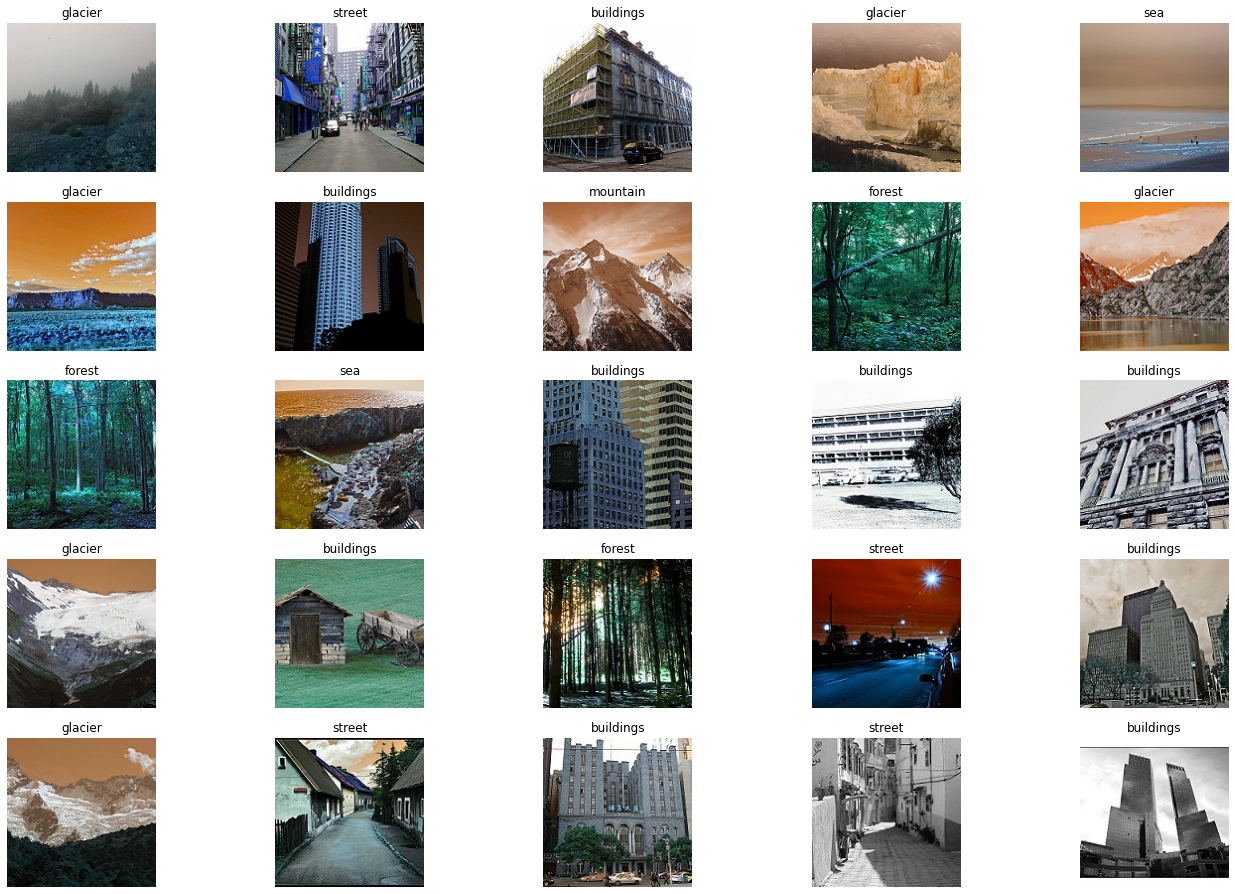

In [8]:
f,ax = plot.subplots(5,5) 
f.subplots_adjust(0,0,3,3)
for i in range(0,5,1):
    for j in range(0,5,1):
        rnd_number = randint(0,len(Images))
        ax[i,j].imshow(Images[rnd_number])
        ax[i,j].set_title(get_classlabel(Labels[rnd_number]))
        ax[i,j].axis('off')


In [9]:
model = Models.Sequential()

model.add(Layers.Conv2D(200,kernel_size=(3,3),activation='relu',input_shape=(150,150,3)))
model.add(Layers.Conv2D(180,kernel_size=(3,3),activation='relu'))
model.add(Layers.MaxPool2D(5,5))
model.add(Layers.Conv2D(180,kernel_size=(3,3),activation='relu'))
model.add(Layers.Conv2D(140,kernel_size=(3,3),activation='relu'))
model.add(Layers.Conv2D(100,kernel_size=(3,3),activation='relu'))
model.add(Layers.Conv2D(50,kernel_size=(3,3),activation='relu'))
model.add(Layers.MaxPool2D(5,5))
model.add(Layers.Flatten())
model.add(Layers.Dense(180,activation='relu'))
model.add(Layers.Dense(100,activation='relu'))
model.add(Layers.Dense(50,activation='relu'))
model.add(Layers.Dropout(rate=0.5))
model.add(Layers.Dense(6,activation='softmax'))
# SVG(model_to_dot(model).create(prog='dot', format='svg'))
# Utils.plot_model(model,to_file='model.png',show_shapes=True)

In [10]:
model.compile(optimizer=Optimizer.Adam(lr=0.0001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 200)     5600      
                                                                 
 conv2d_1 (Conv2D)           (None, 146, 146, 180)     324180    
                                                                 
 max_pooling2d (MaxPooling2D  (None, 29, 29, 180)      0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 27, 27, 180)       291780    
                                                                 
 conv2d_3 (Conv2D)           (None, 25, 25, 140)       226940    
                                                                 
 conv2d_4 (Conv2D)           (None, 23, 23, 100)       126100    
                                                        

C:\Users\chunc\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [11]:
trained = model.fit(Images,Labels,epochs=50,validation_split=0.30) #50epoch

Epoch 1/50
230/230 [==============================] - 52s 212ms/step - loss: 1.4106 - accuracy: 0.4211 - val_loss: 1.0665 - val_accuracy: 0.5773
Epoch 2/50
230/230 [==============================] - 44s 192ms/step - loss: 1.1136 - accuracy: 0.5663 - val_loss: 0.9393 - val_accuracy: 0.6595
Epoch 3/50
230/230 [==============================] - 44s 192ms/step - loss: 1.0161 - accuracy: 0.6229 - val_loss: 1.0169 - val_accuracy: 0.6198
Epoch 4/50
230/230 [==============================] - 44s 193ms/step - loss: 0.8976 - accuracy: 0.6775 - val_loss: 0.8283 - val_accuracy: 0.6909
Epoch 5/50
230/230 [==============================] - 44s 193ms/step - loss: 0.8149 - accuracy: 0.7080 - val_loss: 0.7190 - val_accuracy: 0.7471
Epoch 6/50
230/230 [==============================] - 44s 193ms/step - loss: 0.7608 - accuracy: 0.7379 - val_loss: 0.7083 - val_accuracy: 0.7521
Epoch 7/50
230/230 [==============================] - 45s 194ms/step - loss: 0.7020 - accuracy: 0.7592 - val_loss: 0.6540 - val_ac

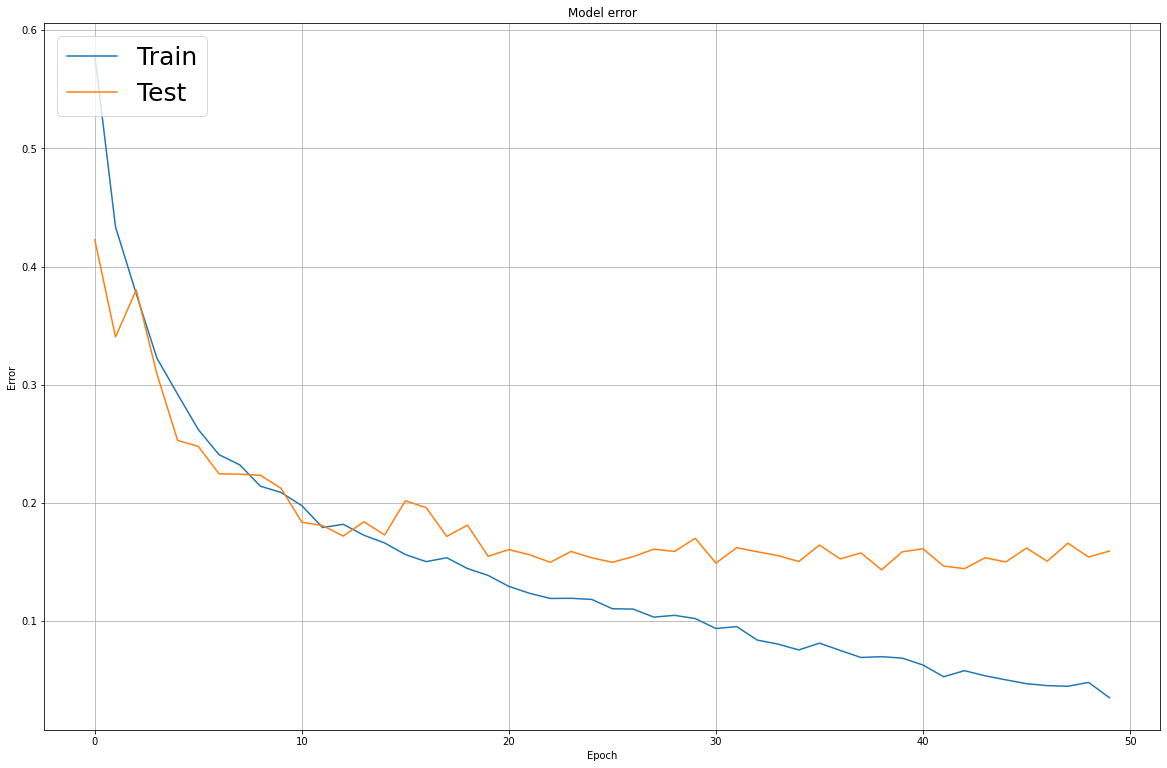

In [16]:
# plot.plot(trained.history['acc'])
# plot.plot(trained.history['val_acc'])
# plot.title('Model accuracy')
# plot.ylabel('Accuracy')
# plot.xlabel('Epoch')
# plot.legend(['Train', 'Test'], loc='upper left')
# plot.show()

plot.figure(figsize=(20,13))
plot.plot(np.ones(len(trained.history['accuracy']))-np.array(trained.history['accuracy']))
plot.plot(np.ones(len(trained.history['val_accuracy']))-np.array(trained.history['val_accuracy']))
plot.title('Model error')
plot.ylabel('Error')
plot.xlabel('Epoch')
plot.grid(True)
plot.legend(['Train', 'Test'], loc='upper left',prop = {'size':25})
# plot.savefig('CNNmodelerror.jpg') 
plot.show()


# plot.plot(trained.history['acc'])
# plot.plot(trained.history['val_acc'])
# plot.title('Model accuracy')
# plot.ylabel('Acc')
# plot.xlabel('Epoch')
# plot.legend(['Train', 'Test'], loc='upper left')
# plot.show()

In [17]:
test_images,test_labels = get_images('./test/','test') #45 epch  86  #50
test_images = np.array(test_images)/255.0
test_labels = np.array(test_labels)
model.evaluate(test_images,test_labels, verbose=1)

69/69 [==============================] - 5s 77ms/step - loss: 9.2335 - accuracy: 0.1355


[9.233494758605957, 0.13545455038547516]

In [18]:
# import zipfile
# zip_ref2 = zipfile.ZipFile('seg_pred.zip', 'r')
# zip_ref2.extractall()
# zip_ref2.close()

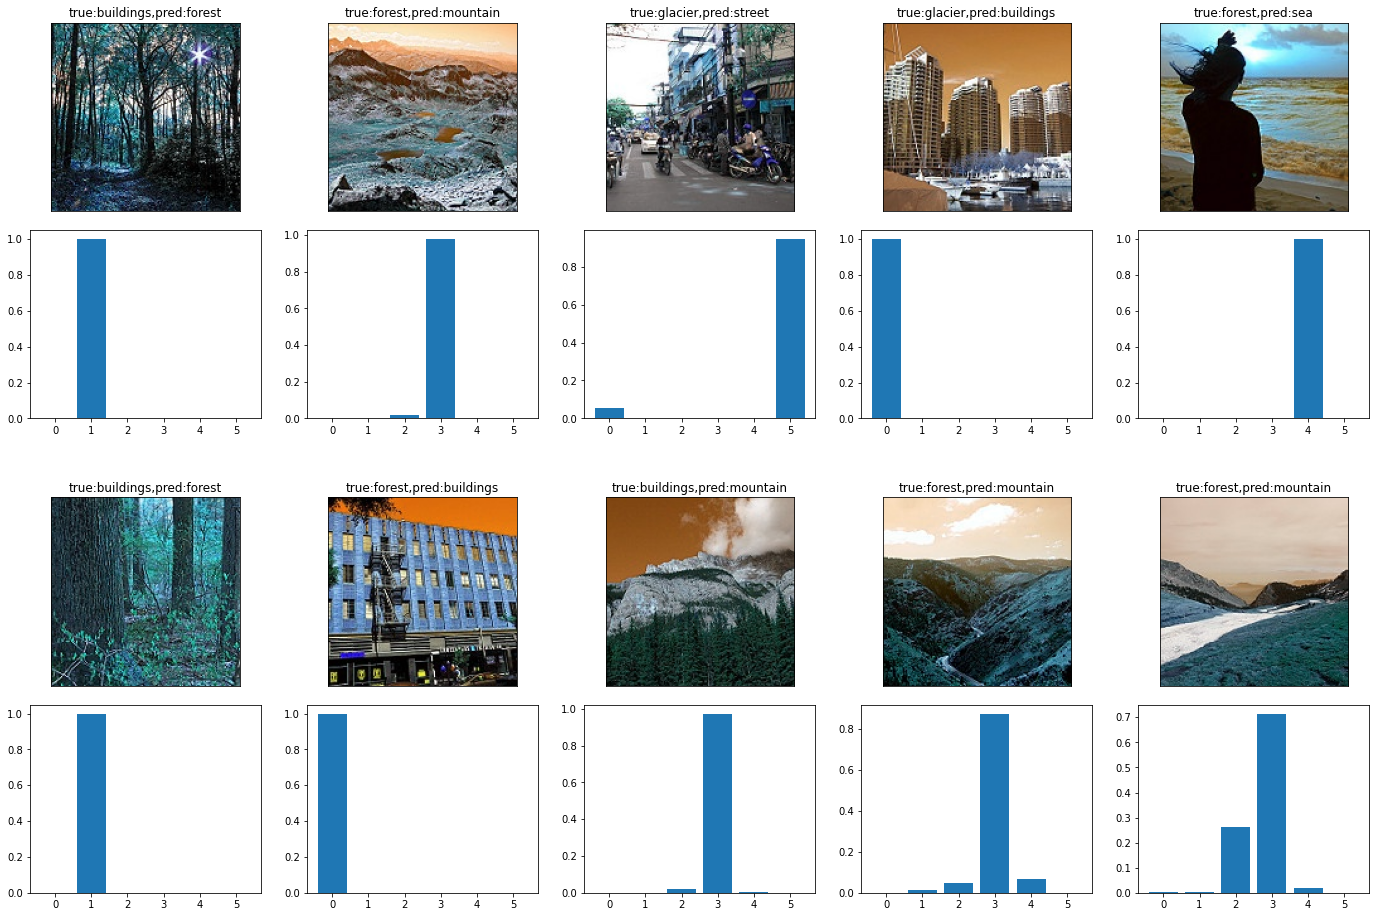

In [19]:
fig = plot.figure(figsize=(24, 16))
outer = gridspec.GridSpec(2, 5, wspace=0.2, hspace=0.2)

for i in range(10):
    inner = gridspec.GridSpecFromSubplotSpec(2, 1,subplot_spec=outer[i], wspace=0.1, hspace=0.1)
    rnd_number = randint(0,len(test_images))
    test_image = np.array([test_images[rnd_number]])
    pre_labels = model.predict(test_image)
    pred_prob = pre_labels.reshape(6)
    for j in range(2):
        if (j%2) == 0:
            ax = plot.Subplot(fig, inner[j])
            ax.imshow(test_image[0])
            ax.set_title('true:{},pred:{}'.format(get_classlabel(test_labels[rnd_number]),get_classlabel(int(np.argmax(pre_labels, axis = 1)))))
            ax.set_xticks([])
            ax.set_yticks([])
            fig.add_subplot(ax)
        else:
            ax = plot.Subplot(fig, inner[j])
            ax.bar([0,1,2,3,4,5],pred_prob)
            fig.add_subplot(ax)


In [20]:
fig.savefig('cnnpreep.jpg')

In [21]:
pre_labels = model.predict(test_images)

In [22]:
pre_labels = np.argmax(pre_labels, axis = 1)

In [23]:
pre_labels

array([3, 1, 4, ..., 1, 3, 5], dtype=int64)

In [24]:
np.where(Labels==3)

(array([   11,    20,    29,    41,    64,    67,   133,   136,   143,
          149,   194,   201,   224,   272,   276,   308,   316,   356,
          367,   375,   379,   405,   416,   460,   537,   554,   582,
          623,   661,   666,   669,   685,   767,   774,   779,   801,
          808,   823,   834,   847,   859,   873,   884,   900,   906,
          910,   965,   970,  1040,  1084,  1088,  1124,  1178,  1186,
         1214,  1271,  1286,  1306,  1319,  1329,  1363,  1378,  1391,
         1396,  1413,  1417,  1427,  1452,  1516,  1522,  1535,  1557,
         1559,  1578,  1595,  1607,  1618,  1626,  1629,  1692,  1695,
         1697,  1787,  1827,  1857,  1868,  1880,  1915,  1967,  1977,
         1978,  1988,  2003,  2062,  2070,  2084,  2091,  2095,  2121,
         2122,  2143,  2164,  2202,  2251,  2271,  2279,  2291,  2363,
         2364,  2367,  2374,  2386,  2409,  2458,  2471,  2503,  2512,
         2541,  2568,  2572,  2602,  2610,  2655,  2657,  2664,  2675,
      

In [26]:
len(Images), len(Labels),len(pre_labels)

(10500, 10500, 2200)

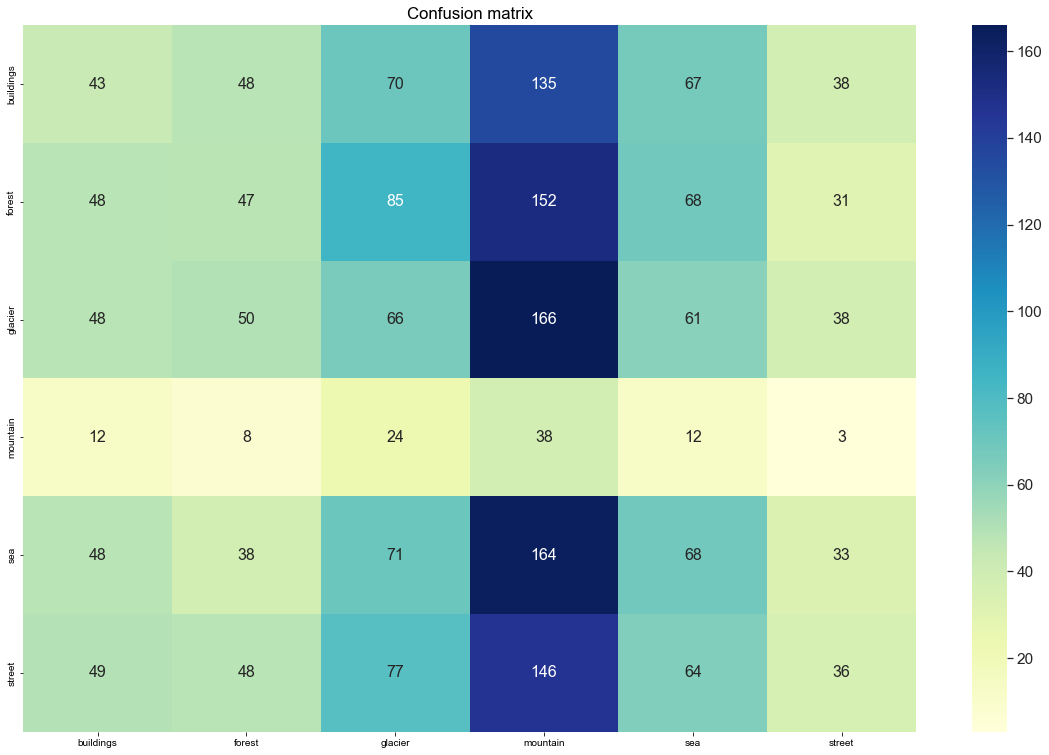

In [34]:
from sklearn.metrics import confusion_matrix# confusion matrix to carry out error analysis
import seaborn as sn 

class_names = ['buildings','forest', 'glacier','mountain', 'sea' ,'street' ]
CM = confusion_matrix(test_labels, pre_labels,labels=np.arange(6))
plot.figure(figsize=(20,13))
ax = plot.axes()
sn.set(font_scale=1.4)
sn.heatmap(CM, annot=True,annot_kws={"size": 16},  xticklabels=class_names, yticklabels=class_names, ax = ax, fmt="d",cmap="YlGnBu")
ax.set_title('Confusion matrix')
plot.savefig('CNN_CM.jpg') # bbox_inches='tight'
plot.show()

In [35]:
plot.savefig('CNN_CM.jpg')

<Figure size 432x288 with 0 Axes>

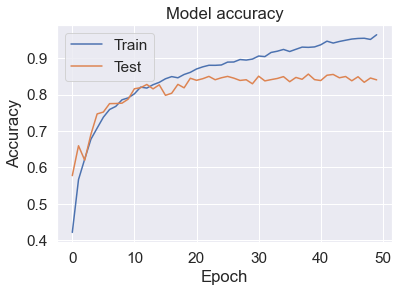

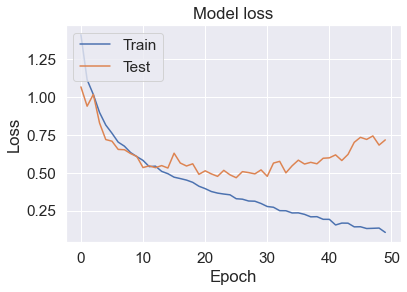

In [38]:
plot.plot(trained.history['accuracy'])
plot.plot(trained.history['val_accuracy'])
plot.title('Model accuracy')
plot.ylabel('Accuracy')
plot.xlabel('Epoch')
plot.legend(['Train', 'Test'], loc='upper left')
plot.show()

plot.plot(trained.history['loss'])
plot.plot(trained.history['val_loss'])
plot.title('Model loss')
plot.ylabel('Loss')
plot.xlabel('Epoch')
plot.legend(['Train', 'Test'], loc='upper left')
plot.show()

In [46]:
# import shutil

# shutil.rmtree('./seg_train')

In [47]:
# shutil.rmtree('./seg_test')

In [48]:
# import zipfile
# zip_ref = zipfile.ZipFile('seg_train.zip', 'r')
# zip_ref.extractall()
# zip_ref.close()

In [49]:
# zip_ref1 = zipfile.ZipFile('seg_test.zip', 'r')
# zip_ref1.extractall()
# zip_ref1.close()

In [50]:
# zip_ref2 = zipfile.ZipFile('seg_pred.zip', 'r')
# zip_ref2.extractall()
# zip_ref2.close()

In [51]:
# Images.shape
# Labels.shape

##  RF

In [52]:
# from sklearn.ensemble import RandomForestClassifier
# rf = RandomForestClassifier(n_estimators = 150)
# Images_rf = Images.reshape(Labels.shape[0],-1)
# rf.fit(Images_rf, Labels)

In [53]:
# index = np.random.randint(test_images.shape[0]) # We choose a random index

# img = test_images[index]
# img_flatten = img.reshape(1,-1)
# predictions = rf.predict(img_flatten)     # Vector of probabilities
# pred_img = np.argmax(predictions[0]) # We take the highest probability
# pred_label = class_names[predictions[pred_img]]
# true_label = class_names[test_labels[index]] 

In [54]:
# title = 'Pred : {} VS True : {}  '.format(pred_label , true_label )

# plt.figure()
# plt.imshow(test_images[index])
# plt.grid(False)
# plt.title(title)
# plt.show()

In [55]:
# def print_mislabeled_images(class_names, test_images, test_labels, pred_labels):
#     """
#         Print 25 examples of mislabeled images by the classifier, e.g when test_labels != pred_labels
#     """
#     BOO = (test_labels == pred_labels)
#     mislabeled_indices = np.where(BOO == 0)
#     mislabeled_images = test_images[mislabeled_indices]
#     mislabeled_labels = pred_labels[mislabeled_indices]
#     fig = plt.figure(figsize=(10,10))
#     fig.suptitle("Some examples of mislabeled images by the classifier:", fontsize=16)
#     for i in range(25):
#         plt.subplot(5,5,i+1)
#         plt.xticks([])
#         plt.yticks([])
#         plt.grid(False)
#         plt.imshow(mislabeled_images[i], cmap=plt.cm.binary)
#         plt.xlabel(class_names[mislabeled_labels[i]])
#     plt.show()

In [56]:
# test_images_flatten = test_images.reshape(test_labels.shape[0],-1)
# predictions = rf.predict(test_images_flatten)
# predictions1 = rf.predict(Images.reshape(Labels.shape[0],-1))
# pred_labels = predictions
# # print_mislabeled_images(class_names, test_images, test_labels, pred_labels)

In [57]:
# plot.figure(figsize=(20,13))
# CM = confusion_matrix(test_labels, pred_labels)
# ax = plot.axes()
# sn.set(font_scale=1.4)
# sn.heatmap(CM, annot=True,annot_kws={"size": 16},  xticklabels=class_names, yticklabels=class_names, ax = ax, fmt='d',cmap='YlGnBu')
# ax.set_title('Confusion matrix')
# plot.savefig('RF_CM.jpg') # bbox_inches='tight'
# plot.show()

In [58]:
# from sklearn.metrics import mean_squared_error
# print(f"MSE: {mean_squared_error(predictions,test_labels)}")
# print(f"MSE: {mean_squared_error(predictions1,Labels)}")

In [59]:
# rf.score(test_images_flatten,test_labels)

In [60]:
# rf.score(Images.reshape(Labels.shape[0],-1),predictions1)

In [61]:
# a = np.ones(len(trained.history['acc']))-np.array(trained.history['acc'])

In [62]:
# b = np.ones(len(trained.history['val_acc']))-np.array(trained.history['val_acc'])

In [63]:
# plot.plot(a)